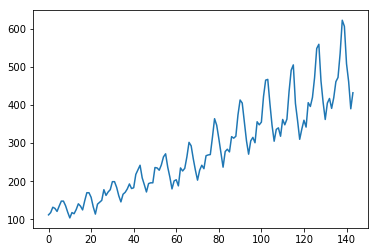

In [83]:
data = """
"Month","International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"
"1949-01",112
"1949-02",118
"1949-03",132
"1949-04",129
"1949-05",121
"1949-06",135
"1949-07",148
"1949-08",148
"1949-09",136
"1949-10",119
"1949-11",104
"1949-12",118
"1950-01",115
"1950-02",126
"1950-03",141
"1950-04",135
"1950-05",125
"1950-06",149
"1950-07",170
"1950-08",170
"1950-09",158
"1950-10",133
"1950-11",114
"1950-12",140
"1951-01",145
"1951-02",150
"1951-03",178
"1951-04",163
"1951-05",172
"1951-06",178
"1951-07",199
"1951-08",199
"1951-09",184
"1951-10",162
"1951-11",146
"1951-12",166
"1952-01",171
"1952-02",180
"1952-03",193
"1952-04",181
"1952-05",183
"1952-06",218
"1952-07",230
"1952-08",242
"1952-09",209
"1952-10",191
"1952-11",172
"1952-12",194
"1953-01",196
"1953-02",196
"1953-03",236
"1953-04",235
"1953-05",229
"1953-06",243
"1953-07",264
"1953-08",272
"1953-09",237
"1953-10",211
"1953-11",180
"1953-12",201
"1954-01",204
"1954-02",188
"1954-03",235
"1954-04",227
"1954-05",234
"1954-06",264
"1954-07",302
"1954-08",293
"1954-09",259
"1954-10",229
"1954-11",203
"1954-12",229
"1955-01",242
"1955-02",233
"1955-03",267
"1955-04",269
"1955-05",270
"1955-06",315
"1955-07",364
"1955-08",347
"1955-09",312
"1955-10",274
"1955-11",237
"1955-12",278
"1956-01",284
"1956-02",277
"1956-03",317
"1956-04",313
"1956-05",318
"1956-06",374
"1956-07",413
"1956-08",405
"1956-09",355
"1956-10",306
"1956-11",271
"1956-12",306
"1957-01",315
"1957-02",301
"1957-03",356
"1957-04",348
"1957-05",355
"1957-06",422
"1957-07",465
"1957-08",467
"1957-09",404
"1957-10",347
"1957-11",305
"1957-12",336
"1958-01",340
"1958-02",318
"1958-03",362
"1958-04",348
"1958-05",363
"1958-06",435
"1958-07",491
"1958-08",505
"1958-09",404
"1958-10",359
"1958-11",310
"1958-12",337
"1959-01",360
"1959-02",342
"1959-03",406
"1959-04",396
"1959-05",420
"1959-06",472
"1959-07",548
"1959-08",559
"1959-09",463
"1959-10",407
"1959-11",362
"1959-12",405
"1960-01",417
"1960-02",391
"1960-03",419
"1960-04",461
"1960-05",472
"1960-06",535
"1960-07",622
"1960-08",606
"1960-09",508
"1960-10",461
"1960-11",390
"1960-12",432

International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60


"""
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd

INPUT_DATA=StringIO(data)
import pandas
import matplotlib.pyplot as plt
dataset0 = pandas.read_csv(INPUT_DATA, usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset0)
plt.show()

## 월별 공항승객수 변화 그래프
Upward 트렌드, 휴가철에 따른 주기성

보통은 전처리 후 사용하지만 예제이므로 이대로 진행

In [84]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [85]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [86]:
# load the dataset
dataset = dataset0.values
dataset = dataset.astype('float32')

In [87]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [88]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [89]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [90]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [91]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [92]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0413
Epoch 2/100
0s - loss: 0.0202
Epoch 3/100
0s - loss: 0.0145
Epoch 4/100
0s - loss: 0.0131
Epoch 5/100
0s - loss: 0.0121
Epoch 6/100
0s - loss: 0.0111
Epoch 7/100
0s - loss: 0.0102
Epoch 8/100
0s - loss: 0.0093
Epoch 9/100
0s - loss: 0.0081
Epoch 10/100
0s - loss: 0.0071
Epoch 11/100
0s - loss: 0.0062
Epoch 12/100
0s - loss: 0.0053
Epoch 13/100
0s - loss: 0.0045
Epoch 14/100
0s - loss: 0.0038
Epoch 15/100
0s - loss: 0.0033
Epoch 16/100
0s - loss: 0.0029
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0024
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0020
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0020
Epoch 29/100
0s - loss: 0.0020
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

In [95]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)  # 원래 스케일로 변환
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 116556.13 RMSE
Test Score: 47.53 RMSE


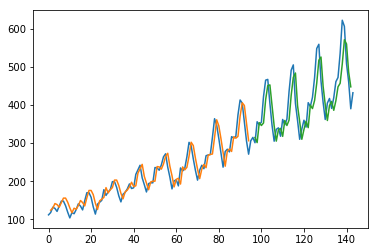

In [100]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()